### <span style="color:darkred"> $T$ Distribution Women Job and Life Satisfaction Comparison</span>

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [5]:
# women = pd.read_csv("./data/data_WomenSatisfaction_Life_Job.csv")
women = pd.read_csv("WomenJob_vs_LifeSatisfaction.csv")

women.head(31)

,Province,Women Life Satisfaction Rate (Age 15-24),Women Job Satisfaction Rate (Age 15-24)
0,Azarbaijan_East,70.27,68.68
1,Azarbaijan_West,78.01,70.86
2,Ardabil,70.63,67.87
3,Isfahan,66.68,77.23
4,Alborz,67.15,72.72
5,Ilam,75.58,68.49
6,Bushehr,69.70,80.43
7,Tehran,65.86,87.67
8,Chaharmahal_and_Bakhtiari,73.12,83.23
9,Khorasan_South,77.89,65.04


In [6]:
stats.ttest_rel(women['Women Life Satisfaction Rate (Age 15-24)'], women['Women Job Satisfaction Rate (Age 15-24)'])

Ttest_relResult(statistic=-4.168569023928257, pvalue=0.00025267754084451114)

In [61]:
x_bar1 = 52.1
sd1 = 45.1

n1 = 22
df1 = n1-1

# Standard Error
se1 = sd1 / np.sqrt(n1)

#### <span style="color:darkred"> Finding t* </span>

![](asset/tscore.png)

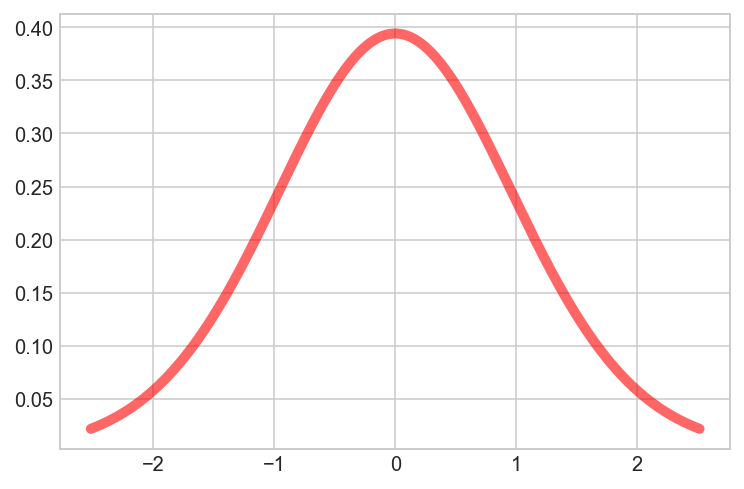

In [115]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.t.ppf(0.01, df1), stats.t.ppf(0.99, df1), 1000)
ax.plot(x, stats.t.pdf(x, df1),'r-', lw=5, alpha=0.6, label='t pdf');

#### <span style="color:darkred"> isf: Inverse survival function: Inverse of `sf` </span>

In [96]:
# Alpha is 0.05, here going to find a t statistics for two-tails shape, each one has 0.025 probability

t1 = stats.t.isf(alpha/2, n1-1)
t1

2.079613844727662

#### <span style="color:darkred"> pdf: Probability Density Function </span>

In [99]:
# Using pdf, the probability for the data given point which is t1=2.079, should be the alpha here is 0.05

stats.t.pdf(t1, df1, loc=0, scale=1)

0.05025149627228048

#### <span style="color:darkred"> cdf: Cummulative Distributionm Function </span>

In [100]:
# Using cdf, the probability for the area below the data given point which is 2.079

stats.t.cdf(t1, df1, loc=0, scale=1)

0.9749999999999991

#### <span style="color:darkred"> sf: Survival Function: `1 - cdf` </span>

In [102]:
# using sf, the probability for the area at the right of the data given point which is 2.07

stats.t.sf(t1, df1, loc=0, scale=1)

0.025000000000000917

#### <span style="color:darkred"> ppf: Percent Point Function: Inverse of `cdf` </span>

In [104]:
# Using ppf to find the data given point for the probability which is alpha/2 here
# Inverse of cdf
# take a look at the isf

stats.t.ppf(alpha/2, df1, loc=0, scale=1)

-2.079613844727662

#### <span style="color:darkred"> interval </span>

In [111]:
# Endpoints of the range that contains alpha percent of the distribution
stats.t.interval(alpha, df1, loc=0, scale=1)

(-0.06346049354675869, 0.06346049350116284)

In [114]:
stats.t.interval(0.95, df1, loc=0, scale=1)

(-2.079613844727662, 2.079613844727662)

In [116]:
# Confidence Interval Using Formula

Lower_band = x_bar1 + (t1 * se1)
upper_band = x_bar1 - (t1 * se1)

print(f"{cl} confident that distracted eaters consume between {round(Lower_band, 2)} to {round(upper_band, 2)} grams of snacks post-meal ")

0.95 confident that distracted eaters consume between 72.1 to 32.1 grams of snacks post-meal 


In [117]:
# Confidence Interval Using Scipy

stats.t.interval(cl, df1, x_bar1, se1)

(32.10378021910188, 72.09621978089812)

In [118]:
print(f"{cl} confident that distracted eaters consume between {round(stats.t.interval(cl, dof1, x_bar1, se1)[0], 3)} to {round(stats.t.interval(cl, dof1, x_bar1, se1)[1], 3)} grams of snacks post-meal ")

0.95 confident that distracted eaters consume between 32.104 to 72.096 grams of snacks post-meal 


### <span style="color:darkred"> One-Sample $t$-test: Hypothesis </span>

> **Question:** Suppose the suggested serving size of those biscuits is 30 g. Do these data provide convincing evidence that the amount of snacks consumed by distracted eaters post-lunch is different that the suggested serving size?

- $H_0: \mu = 30$
- $H_A: \mu \neq 30$

> $T = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$

In [119]:
mu1 = 30

# Here T is different than the t statistics, mu came to play here
T1 = (x_bar1 - mu1) / se1
T1

2.2984077226629225

#### <span style="color:darkred"> Finding $p$-value </span>

![](asset/t_Pvalue.png)

In [127]:
p_value1 = 2 * (1 - stats.t.cdf(T1, df1))
p_value1

0.03190848757439668

#### Considering these as well

In [126]:
stats.t.cdf(T1, df1, loc=0, scale=1)

0.9840457562128017

In [128]:
stats.t.sf(T1, df1, loc=0, scale=1)

0.01595424378719836

In [129]:
stats.t.pdf(T1, df1, loc=0, scale=1)

0.03340321857123187

In [130]:
if p_value1 > alpha:
    print(f"Since P_Value is {p_value1} which is more than {np.round(alpha, 2)} , it is likely to observe the data and then do not reject the Null Hypothesis")
else:
    print(f"Since P_Value is {p_value1}, which is less than {np.round(alpha, 2)} it would be very unlikely to observe the data and then reject the Null Hypothesis, concluding that the mean is not equal to {mu1}")

Since P_Value is 0.03190848757439668, which is less than 0.05 it would be very unlikely to observe the data and then reject the Null Hypothesis, concluding that the mean is not equal to 30


> **90TE**: In the hypothesis test, rejecting the null hypothesis that sets `µ` equal to 30. That means that in the confidence interval, should expect to not find that `µ`. which is true, lower band is 32.1 and upper band is 72.09

### <span style="color:darkred"> One-Sample $t$-test: Hypothesis and Confidence Interval for using pre-determined `data list` </span>

- $H_0: \mu \geq 8$
- $H_A: \mu < 8$

In [131]:
data = [6.5,7,7.5,3,4.5,5,5.5,5.5,6,6,7,6.5,6.5,5,6]
mu = 8

cl = 0.95
df = len(data) - 1

In [132]:
stats.ttest_1samp(data , mu)

Ttest_1sampResult(statistic=-7.33298897263096, pvalue=3.715806740608815e-06)

In [133]:
stats.t.interval(cl, df, np.mean(data), stats.sem(data))

(5.199616599111554, 6.467050067555112)

In [136]:
print(f"{cl} of the observations fall between {np.round(stats.t.interval(cl, df, np.mean(data), stats.sem(data))[0], 4)} and {np.round(stats.t.interval(cl, df, np.mean(data), stats.sem(data))[1], 4)}")

0.95 of the observations fall between 5.1996 and 6.4671


In [138]:
stats.t.interval(cl, df, np.mean(data), np.std(data))

(3.4621824336101557, 8.20448423305651)

## <span style="color:darkred"> 2 - Two-Sample $t$-test </span>

When doing experiments, more likely to compare results from two groups instead of comparing one group to a number. This is where a **two-sample $t$-test** comes into play. 

A **two-sample $t$-test** is appropriate to compare two **independent** samples' means and test whether it is likely that the two populations could have the same mean. It's different than a **matched pairs $t$-test** which is appropriate to compare two **dependent** samples' means and test whether it is likely that the two populations could have the same mean.

Check out the [documentation1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind) and [documentation2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html) for a two-sample $t$-test.

![](asset/twoIndttest.png)

This estimate is not exact degrees of freedom. The exact formula is actually kind of complicated. However this is a pretty good conservative estimate (because of MIN). And when doing inference especially based on small samples, better to be conservative. Because should not act like having more degrees of freedom, or in other words, more data, than actually exists. By the way the exact formula is:

![](asset/twoIndttest_df.png)

### <span style="color:darkred"> TWO-Sample $t$-test: Hypothesis Test </span>

> **Question:** Does data in the case study provide convincing evidence of a difference between the average post-meal snack consumption between those who eat with and without distractions?

- $H_0: \mu1 - \mu2 = 0$
- $H_A: \mu1 - \mu2 \neq 0$

In [183]:
a = np.square((np.square(sd1)/n1) + (np.square(sd2)/n2))
b = (1/(n1-1))*np.square((np.square(sd1)/n1))
c = (1/(n2-1))*np.square((np.square(sd2)/n2))
DF = a / (b + c)
DF

33.879263805934805

In [175]:
# Null Hypothesis:
# mu1 - mu2 == 0

x_bar1 = 52.1
sd1 = 45.1

n1 = 22
df1 = n1-1

x_bar2 = 27.1
sd2 = 26.4

n2 = 22
df2 = n2-1

# Standard Error
se = np.sqrt((np.square(sd1) / (n1)) + (np.square(sd2) / (n2)))

# Degrees of Freedom
df = min(df1,df2)

# mu1 - mu2 = 0
T = ((x_bar1 - x_bar2) - 0) / se
T

2.243845159634432

![](asset/twottest_T.png)

In [176]:
p_value = 2 * (1 - stats.t.cdf(T, df))
p_value

0.03575082267141538

In [177]:
if p_value > alpha:
    print(f"Since P_Value is {np.round(p_value, 3)} which is more than {np.round(alpha, 2)} , it is likely to observe the data and then do not reject the Null Hypothesis")
else:
    print(f"Since P_Value is {np.round(p_value, 3)}, which is less than {np.round(alpha, 2)} it would be very unlikely to observe the data and then reject the Null Hypothesis, concluding that these data do indeed provide convincing evidence that there is a difference between the average snack intakes of post meal of people who eat their meal while distracted verses those without any distraction. ")

Since P_Value is 0.036, which is less than 0.05 it would be very unlikely to observe the data and then reject the Null Hypothesis, concluding that these data do indeed provide convincing evidence that there is a difference between the average snack intakes of post meal of people who eat their meal while distracted verses those without any distraction. 


#### <span style="color:darkred"> Finding $p$-value and T </span>

[documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind_from_stats.html)

> **Here, since not using the exact correct version of df, $p$-value is slightly different than the previous section**

In [178]:
stats.ttest_ind_from_stats(x_bar1, sd1, n1, x_bar2, sd2, n2, equal_var=True)

Ttest_indResult(statistic=2.2438451596344318, pvalue=0.03017203250342612)

### <span style="color:darkred"> TWO-Sample $t$-test: Confidence Interval </span>

> **Question:** Estimating the difference between the average post-meal snack consumption between those who eat with and without distractions?

#### <span style="color:darkred"> Finding t* </span>

![](asset/tscore.png)

In [157]:
# Alpha is 0.05, here going to find a t statistics for two-tails shape, each one has 0.025 probability

t = stats.t.isf(alpha/2, min(n1-,n2-1))
t

2.079613844727662

In [153]:
Lower_band = (x_bar1 - x_bar2) - t * (se)
upper_band = (x_bar1 - x_bar2) + t * (se)

print(f"{cl} confident that distracted eaters consume between {round(Lower_band, 2)} to {round(upper_band, 2)} grams of snacks post-meal ")

0.95 confident that distracted eaters consume between 1.83 to 48.17 grams of snacks post-meal 


In [155]:
# Confidence Interval Using Scipy

stats.t.interval(cl, df, x_bar1-x_bar2, se)

(1.8297977714906892, 48.17020222850931)

In [156]:
print(f"{cl} confident that distracted eaters consume between {round(stats.t.interval(cl, df, x_bar1-x_bar2, se)[0], 3)} to {round(stats.t.interval(cl, df, x_bar1-x_bar2, se)[1], 3)} grams of snacks post-meal ")

0.95 confident that distracted eaters consume between 1.83 to 48.17 grams of snacks post-meal 


> **90TE:** Rejecting the null hypothesis that set the difference between the two means equal to zero, and therefor that null value should not be included in the confidence interval (1.83, 48.17) and indeed zero is not in the confidence interval

### <span style="color:darkred"> Two-Sample $t$-test: Using pre-determined `data list` </span>

In [158]:
data = [6.5,7,7.5,3,4.5,5,5.5,5.5,6,6,7,6.5,6.5,5,6]
group_a = data[0:8]
group_b = data[8:]

stats.ttest_ind(group_a, group_b)

Ttest_indResult(statistic=-0.9784163096277243, pvalue=0.34572599932044457)

## <span style="color:darkred"> 3- Matched Pairs $t$-test <span style="color:red"> ... This section will be continuing after ANOVA </span></span> 

From the documentation for the two-sample $t$-test, it was very clear that the two samples needed to be **independent** of one another. That is, changes in one group should not affect the other group.

However, this isn't always the case. Suppose developing a drug that helps to reduce the systolic blood pressure of individuals. Then: 
- Recruit 10 individuals to participate in the study.
- Measuring all 10 patients' systolic blood pressure.
- Administering the drug to all 10 patients over the course of eight weeks.
- Measuring all 10 patients' systolic blood pressure again.

In this case, comparing the **pre-**drug values against the **post-**drug values to see if the drug had the intended effect. Here, the pre-drug values and post-drug values are certainly not independent of one another - taking the measurements on the same people!

This is where the **matched pairs $t$-test** comes into play. The matched pairs t-test is a way to take two dependent samples and compare their means. (Spoiler alert: it just takes sample 2, subtracts sample 1, and conducts a one-sample $t$-test on the difference.)

<details><summary>
In this case, what the hypotheses would be?
</summary>
```
H_0: mu_pre = mu_post
H_A: mu_pre != mu_post
```
</details>

Checking out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) for a matched pairs $t$-test.

In [159]:
systolic_pre = [130,135,139,153,160,142,136,128,144,155]
systolic_post = [125,134,140,151,160,140,138,124,141,148]

In [160]:
stats.ttest_rel(systolic_pre, systolic_post)

Ttest_relResult(statistic=2.400108850942297, pvalue=0.039890766746082586)

# <span style="color:darkred"> Interference for Numerical Variables - ANOVA & F Distribution </span>

Suppose having three assembly lines running in a factor and want to identify if the lines are all performing at roughly the same level, or if at least one line is slower than the others.

In this case, it's not possible to run a one-sample or a two-sample test... so need to use **ANOVA**, or **"Analysis of Variance,"** which compare more than two **independent** samples means and test whether it is likely that all populations could have the same mean.

Despite its name, ANOVA is a type of hypothesis test that will test whether or not all samples have the same mean.

<details><summary>
In this case, what would be the hypotheses would be?
</summary>
```
H_0: mu_A = mu_B = mu_C = ...
H_A: at least one mu_i != mu_j.
```
</details>

Checking out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) for ANOVA.

# <span style="color:darkred"> Case Study B </span>

Considering two variables from the general social survey: 
> A vocabulary score, which is calculated based on ten question vocabulary test &

> A self-identified social class

In the first variable, respondents are given the list of words and asked to choose a word from a list of provided options that comes closest to the meaning of the first word provided in the capital letters. 

* Here is the **distribution of the vocabulary scores**. This variable is a numerical variable that ranges from zero to 10, so a histogram is a good option for visualizing this distribution

![](asset/histt.png)

* As for the **social class**, respondents were asked to choose their social class among 4 categories. The distribution of this categorical variable and the bar plot presented as following!

![](asset/barr.png)

> **Now trying to figure out how these two variables are related to each other, using the table below:**

![](asset/anovatable.png)

> **As shown here the problem is to compare more than two means to each other.**
The goal is to find out if there is a difference between the average vocabulary scores of American from different self-reported classes.

> To compare means of three or more groups using a test called **Analysis of Variance (ANOVA)** and a statistic which is called `F` statistic. 

## <span style="color:darkred"> Hypothesis in ANOVA </span>

- $H_0: \mu_A = \mu_B = \mu_C$ = ...
- $H_A:$
at least one
$\mu_i \neq \mu_j$

> **ANOVA** does not tell which means are different from each other. It also does not tell, necessarily, that all of the means are different from each other. 

> Basically what it’s telling is that there may be something interesting to investigate further because the next natural question would be what, which groups? 

## <span style="color:darkred"> ANOVA Test </span>

![](asset/anovatest.png)

**90TE:** Large test statistics always lead to small P-values. Because the further pushing test statistics to the tails of the distribution the thinier tail areas are going to be left with. And If the P-Value is small enough, possible to reject the null hupothesis and conclude the data provide evidence of a difference in the population means.


## <span style="color:darkred"> F Distribution Shape </span>

![](asset/f.png)

The `F` Distribution is right skewed and the $P$-Value is calculated as the shaded area shown here, **the tail area beyond the observed F statistic.** 

> In order to reject the null hypothesis, need to have a small P-Value, which requires a large F statistic

> In order to obtain a large F statistic, variability between sample means need to be much greater than the variability within sample means. 

**So the goal here is going to be to determine measures of variability between and within groups.**

In the example above:

- **The vocabulary score is the response variable (dependent)** and 

- **Class is the explanatory variable(Independent).**
![](asset/cse.png)

### <span style="color:darkred"> Variability Partitioning </span>

**Variability Partitioning** means considering different factors that might contribute to variability in the data.

![](asset/partition.png)

Here partitioning total variability in vocabulary score into two different groups:

-	The first one is the **variability that can be attributed to the social class** and 
-	The other portion is the **variability attributed to all other factors**. 

> variability attributed to **social class is the between group variability**, and group here meaning the grouping variable that considering in this analysis.

> The other type of variability is what not interested in. Saying that **within group variability** because once splitting respondents into the four groups, according to explanatory variable, should know how much variability is still remaining within each group that may be due to factors other than the social class. 

**90TE**: once putting the respondents into the four different social class, within each class everybody has the same class now. So any further variability that’s observed within the groups is going to be due to other reasons, and that’s what calling the within group variability.

## <span style="color:darkred"> ANOVA Output </span>

This is what the ANOVA output usually looks like. Having two rows and then a total row and the two rows are about the between group and the within group variability

![](asset/anovaoutput.png)

Here the following should be calculated:

- SST
- SSG
- SSE
- df for Group
- df for Error
- Mean Square (MSG & MSE)
- $F$-Value
- $P$-Value

#### <span style="color:darkred"> 1- SST (Sum of Squares Total) </span>

**SST** measures the total variability in the response variable.
-	In this case the response variable is the vocabulary scores. So, 3106.36 is the total variability in the vocabulary scores. 

![](asset/SST.png)

-	It’s calculated very similarly to variance except it’s not scaled by the sample size. 

![](asset/SSTc.png)

Here, `y̅` is the overall mean, before doing any splitting into groups. Taking the differences between each observation, and then the sample mean, square the differences, and add them up. And `n`, here, stands for, as usual, the sample size. 

* The number here (3106.36) is on its own, it’s not a very meaningful number. 

#### <span style="color:darkred"> 1-2- SSG (Sum of Squares Group) </span>

**SSG** measures the variability between groups. This is the explained variability, meaning that explained by the explanatory variable considering in this particular analysis.

It calculates by deviation of each one of the group means from overall mean, and then going to weight that by the sample size. So, Here looking at how much does each group, on average, differ from the overall sample mean

![](asset/SSG.png)

Again, this number is also on its own, and it is not necessarily a meaningful number. 

> However possible to think about how big this number is in comparison to the overall variability that been calculated in the previous step to see what percent of the variability can be attributed to the group, the explanatory variable that working with.

> So, the ratio is important, but the actual magnitudes of the numbers are not necessarily what are focusing on here. 

#### <span style="color:darkred"> 1-3- SSE (Sum of Squares Error) </span>

**SSE** measures the variability within groups. The row in between in the group and the total, could be called the residuals. It's an Unexplained variability meaning unexplained by the grouping variable that been considering, but it’s the variability that’s due to all the other reasons that are not considering in this analysis. 

![](asset/SSE.png)

> Again, the magnitude of SSE (here is: 2896.8) is not important, but let’s take a look at the ratios real quick.

It appears that, of the total variability, more of it (a higher proportion of it), can be attributed to the **within group**, or the **error**, as opposed to the grouping variable. 

> So the grouping variable that considering here, is not doing a great job explaining the overall variability. Meaning there must be many other reasons that contribute to, why people score differently on the vocabulary test. There must be many other reasons than just their self-identified class. Something like education, or how much they read, would probably be a much better indicator of their score than their self-identified social class.

#### <span style="color:darkred"> 2- Average Variability (Mean Square, MSG & MSE) </span>

Now, need to get from these measures of total variability that just calculated to **average variability**. Going to scale by a measure that incorporates the sample sizes and the number of groups that exist.
> A measure incorporates both the sample size and the number of group is **degrees of freedom**. 

![](asset/MSGMSE.png)


#### <span style="color:darkred"> 3- F Statistics </span>

**F Statistic** is Calculating by the ratio of the between and within group variability

![](asset/Fstatistics.png)

#### <span style="color:darkred"> 4- $p$ Value </span>

![](asset/pvalue_f.png)

> **$P$-Value is the probability of at least as large a ratio between the “between” and “within” group variability, if in fact, the means of all groups are equal to each other. This is another way of saying P-Value is the probability of observed or more extreme outcome, if in fact, the null hypothesis is true.**

> This is going to be the area under the F curve, and note that **F curve has two degrees of freedom associated with it**, the group and the error. And that’s going to be any area that’s above the observed F statistic. 

### <span style="color:darkred"> Conditions for ANOVA </span>

There are there main conditions for ANOVA:

> **Independence** 
-	**Within groups independence:** sample observation must be independent of each other 
-	**Between group independence:** The groups must be independent of each other (non-paired)

> **Approximate Normality:** Distributions should be nearly normal within each group

> **Equal variance:** Groups should have roughly equal variability

#### <span style="color:darkred"> Independence </span>

Sampled observations must be independent of each other using:
-	Random sample / assignment
-	Sample size for each group needs to be less than 10% of respective population
-	Carefully consider whether the groups may independent (no pairing between the groups). 
> If groups are paired or dependent on each other, there are methods for doing ANOVA for them as well (called: **Repeated Measures ANOVA**)  

#### <span style="color:darkred"> Approximately Normality </span>

The distribution of the response variable within each group should be approximately normal, and this is especially important when the sample size is small. 
> One way to checking for this condition could be looking at normal probability plots for each one of the groups. 

#### <span style="color:darkred"> Constant Variance </span>

* Variability should be consistent across groups. **In other words, groups should be homoscedastic.**

* This is especially important when the sample sizes differ between groups. So, if having equal sample sizes, may not care about it as much. But if don’t, then want to make sure that having roughly equal variability across the groups. 
> Checking this condition using side by side box plots

In [2]:
# The vocabulary score is the response (dep) variable and
# Class is the explanatory (ind) variable.

n1 = 41
x_bar1 = 5.07
sd1 = 2.24

n2 = 407
x_bar2 = 5.75
sd2 = 1.87

n3 = 331
x_bar3 = 6.76
sd3 = 1.89

n4 = 16
x_bar4 = 6.19
sd4 = 2.34

n_total = 795
x_bar_total = 6.14
sd_total = 1.98

#### <span style="color:darkred"> Sum of Squares </span>

In [3]:
# Sum of Squares Total, total variability in the response variable (all the observations)
sst = 3106.36

In [4]:
# Sum of Squares Group, measures the variability between groups
ssg = n1*(np.square(x_bar1 - x_bar_total)) + n2*(np.square(x_bar2 - x_bar_total))+ n3*(np.square(x_bar3 - x_bar_total)) + n4*(np.square(x_bar4 - x_bar_total))
ssg = 236.56

In [5]:
## Sum of Squares Error, measures the variability within groups.
sse = sst - ssg

#### <span style="color:darkred"> Degress of Freedom </span>

In [6]:
# Total Number of Groups, here is class
n_group = 4
df_group = n_group - 1

# Total Number of Observations
n_total = 795
df_total = n_total - 1

# Degrees of Freedom of the Error
df_error = df_total - df_group

#### <span style="color:darkred"> Average Variability </span>

In [7]:
# Average Variability between groups
msg = ssg / df_group

# Average Variability within groups
mse = sse / df_error

#### <span style="color:darkred"> F Value </span>

In [8]:
# F Value
F = msg / mse
F

21.73426255023579

#### <span style="color:darkred"> $p$-value </span>

In [10]:
1 - stats.f.cdf(F, df_group, df_error)

1.56097357262297e-13

### <span style="color:darkred"> ANOVA Using pre-determined `data list` </span>

In [11]:
line_a = [6,5,4,8,7]
line_b = [6,4,3,7,4]
line_c = [1,3,2,4,4]

In [12]:
stats.f_oneway(line_a,line_b,line_c)

F_onewayResult(statistic=5.681159420289854, pvalue=0.018365036502725765)

## <span style="color:darkred"> Multiple Comparison & Modified Significance Level </span>

The natural next question after rejecting the null hypothesis in ANOA is: 
> **Which means are actually different from each other?**

#### This is what to be addressed but, before that, considering an important factor which is a **modified Significance Level**

Note thta with each test there is a possibility to incur a **type 1 error (significance level, usually 5%)**.

* If doing only one test, then just having a **5% type 1 error rate**.

* If doing many, many tests, though, going to be **inflating the type 1 error rate** because with each one, incurring the same rate, and that is not something that want to do. 
> **when doing hypothesis tests, should keep the error rates down as much as possible**

### <span style="color:darkred"> Modified Significance Level </span>

The idea is:
-	Doing two sample t tests for differences in each possible pair of groups and
-	When doing multiple tests, though, talking about how going to be inflating Type 1 error rate
-	So, the solution proposing here is to use a **modified significance level**

### <span style="color:darkred"> Multiple Comparison </span>

**The idea of testing many pairs of groups at once is called multiple comparisons**

* The **Bunferroni Correction** suggests that a more stringent significance level is more appropriate for these tests

> **And here this is not how many groups having, but how many comparisons considering. So, how many pairs possible to be  between these groups** 

* `K`: Number of Comparison

* `k`: Number of Groups

![](asset/bc.png)

**In the social class variables there are 4 levels. If α=0.05, the modified significance level for two sample t tests, determining which pairs of groups have significantly different means are as below:**

In [23]:
alpha = 0.05

# Number of Groups
k = 4

# Number of Comparisons
k_capital = k * (k-1) / 2

# Modified Significance Level
alpha_star = alpha / k_capital
np.round(alpha_star, 4)

0.0083

## <span style="color:darkred"> 3- Matched Pairs $t$-test <span style="color:red"> ... This section is the continious part from T Distributon </span></span> 

Checking out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) for a matched pairs $t$-test.

The natural next question after rejecting the null hypothesis is: 
> **Which means are actually different from each other?**

* For multiple comparisons after ANOVA, since the assumption of equal variability across groups must have been satisfied, now going to have to re-think the standard error and the degrees of freedom.

 > **1. Need to have a *consistent measure of standard error* and *consistent degrees of freedom* for all tests regardless of the individual groups, standard deviations or sample sizes**
 
 > **2. At the end, comparing the $P$-Values from each of these tests to the modified significance level, the more stringent one as oppose to the initial significance level of usually 5%!**

> For the standard error, instead of using the individual variances for the groups that suppose to be compared, simply using the means square error from the ANOVA output.

> For the degrees of freedom, simply going to use a consistent degree of freedom for each of the pairings regardless of the sample sizes of the groups that bing comparing and that’s going to be the degrees of freedom associated with the error term

![](asset/mc.png)

#### <span style="color:darkred"> Question: Is there a difference between the average vocabulary scores between middle and lower class Americans </span> 

- $H_0: \mu_3 - \mu_1 = 0$
- $H_A: \mu_3 - \mu_1 \neq 0$

#### <span style="color:darkred"> Hypothesis Test </span>

In [41]:
# Null Hypothesis:
# mu3 - mu1 == 0

cl = 0.95

# Standard Error
se = np.sqrt(mse/n3 + mse/n1)

# Degress of Freedom
df = df_error

# Modified Significance Level
alpha_star = alpha_star

In [42]:
# mu3 - mu1 = 0
T = ((x_bar3 - x_bar1) - 0) / se
T

5.358997889910534

In [43]:
p_value = 2 * (1 - stats.t.cdf(T, df))
p_value

1.0985643617011931e-07

In [44]:
if p_value > alpha_star:
    print(f"Since P_Value is {np.round(p_value, 3)} which is more than {np.round(alpha_star, 5)} , it is likely to observe the data and then do not reject the Null Hypothesis")
else:
    print(f"Since P_Value is {np.round(p_value, 3)}, which is less than {np.round(alpha_star, 5)} it would be very unlikely to observe the data and then reject the Null Hypothesis. Concluding average vocabulary scores of self-identified middle and lower class Americans are different ")

Since P_Value is 0.0, which is less than 0.00833 it would be very unlikely to observe the data and then reject the Null Hypothesis. Concluding average vocabulary scores of self-identified middle and lower class Americans are different 


#### <span style="color:darkred"> Confidence Interval </span>

In [45]:
t = stats.t.isf(alpha_star/2, df)
t

2.6449106345724305

In [47]:
Lower_band = (x_bar3 - x_bar1) - t * (se)
upper_band = (x_bar3 - x_bar1) + t * (se)

print(f"{cl} confident that difference average vocabulary score of the middle and lower calss is between {round(Lower_band, 2)} to {round(upper_band, 2)}")

0.95 confident that difference average vocabulary score of the middle and lower calss is between 0.86 to 2.52


In [49]:
stats.t.interval(1-alpha_star, df, x_bar3-x_bar1, se)

(0.8559076819487174, 2.5240923180512818)

## <span style="color:darkred"> EXERCISE </span>

- In the `data` folder, using a sample of Walmart stores data, reading in the `stores.csv`. 
- In the `data` folder, using a sample of Walmart stores data, reading in the `train.csv`. 

In [50]:
stores = pd.read_csv("./data/stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [51]:
train = pd.read_csv("./data/train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


### <span style="color:darkred"> a) </span>

**Testing whether the average size of the `stores` file was different across types, conducting the hypothesis test, finding $p$-value, and making the appropriate conclusion.**

In [52]:
stores['Type'].value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [53]:
stats.f_oneway(stores[stores['Type'] == 'A']['Size'], 
               stores[stores['Type'] == 'B']['Size'],
               stores[stores['Type'] == 'C']['Size'])

F_onewayResult(statistic=34.34822194883028, pvalue=1.4502004628034625e-09)

> Hypotheses: 
- $H_0: \mu_A = \mu_B = \mu_C$
- $H_A$: at least one $\mu_i \neq \mu_j$

In [54]:
alpha = 0.05
p_value = stats.f_oneway(stores[stores['Type'] == 'A']['Size'], 
               stores[stores['Type'] == 'B']['Size'],
               stores[stores['Type'] == 'C']['Size'])[1]

In [55]:
def check_the_hypothesis(p_value):
    if p_value > alpha:
        print(f"Since P_Value is {p_value} which is more than {np.round(alpha, 2)} , it is likely to observe the data and then do not reject the Null Hypothesis")
    else:
        print(f"Since P_Value is {p_value}, which is less than {np.round(alpha, 2)} it would be very unlikely to observe the data and then reject the Null Hypothesis.")

In [45]:
check_the_hypothesis(p_value)

Since P_Value is 1.4502004628034625e-09, which is less than 0.05 it would be very unlikely to observe the data and then reject the Null Hypothesis.


### <span style="color:darkred"> b) </span>

**Testing whether average weekly sales of `train` file was different among the type of stores, conducting the hypothesis test, finding $p$-value, and making the appropriate conclusion.**

In [56]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [57]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [58]:
combined = train.merge(stores, how = 'left', on = 'Store')
combined.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [59]:
stats.f_oneway(combined[combined['Type'] == 'A']['Weekly_Sales'],
               combined[combined['Type'] == 'B']['Weekly_Sales'],
               combined[combined['Type'] == 'C']['Weekly_Sales'])

F_onewayResult(statistic=7764.426217449252, pvalue=0.0)

In [60]:
alpha = 0.05
p_value = stats.f_oneway(combined[combined['Type'] == 'A']['Weekly_Sales'],
               combined[combined['Type'] == 'B']['Weekly_Sales'],
               combined[combined['Type'] == 'C']['Weekly_Sales'])[1]

In [51]:
check_the_hypothesis(p_value)

Since P_Value is 0.0, which is less than 0.05 it would be very unlikely to observe the data and then reject the Null Hypothesis.


### <span style="color:darkred"> c) </span>

**Testing whether average weekly sales differs on holidays versus non-holidays, conducting the hypothesis test, finding $p$-value, and making the appropriate conclusion.**

In [61]:
stats.ttest_ind(combined[combined['IsHoliday'] == True]['Weekly_Sales'],
                combined[combined['IsHoliday'] == False]['Weekly_Sales'])

Ttest_indResult(statistic=8.294756853931894, pvalue=1.0912222677432844e-16)

In [62]:
alpha = 0.05
p_value = stats.ttest_ind(combined[combined['IsHoliday'] == True]['Weekly_Sales'],
                combined[combined['IsHoliday'] == False]['Weekly_Sales'])[1]

check_the_hypothesis(p_value)

Since P_Value is 1.0912222677432844e-16, which is less than 0.05 it would be very unlikely to observe the data and then reject the Null Hypothesis.


### <span style="color:darkred"> d) </span>

**Generating and interpreting a 95% confidence interval for the true average weekly sales among holiday weeks**

In [63]:
combined.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [64]:
cl = 0.95
dof = combined[combined['IsHoliday'] == True].shape[0] - 1
mean = combined[combined['IsHoliday'] == True]['Weekly_Sales'].mean()
std = (np.std(combined[combined['IsHoliday'] == True]['Weekly_Sales']) / combined[combined['IsHoliday'] == True].shape[0] ** 0.5)

In [65]:
# # Compare with previous one
# stats.t.interval(0.95,
#                  combined[combined['IsHoliday'] == True].shape[0],
#                  loc = combined[combined['IsHoliday'] == True]['Weekly_Sales'].mean(),
#                  scale = (np.std(combined[combined['IsHoliday'] == True]['Weekly_Sales'], ddof = 1)) / combined[combined['IsHoliday'] == True].shape[0] ** 0.5)

In [66]:
stats.t.interval(alpha=cl, df=dof, loc=mean, scale=std)

(16726.020176130354, 17345.626198570608)

In [67]:
print(f"There is {cl} confience that the true average weekly sales among holiday weeks is between {np.round(stats.t.interval(alpha=cl, df=dof, loc=mean, scale=std)[0], 2)} and {np.round(stats.t.interval(alpha=cl, df=dof, loc=mean, scale=std)[1], 2)} ")

There is 0.95 confience that the true average weekly sales among holiday weeks is between 16726.02 and 17345.63 


### <span style="color:darkred"> e) </span>

**Generating and interpreting a 95% confidence interval for the true average weekly sales among non-holiday weeks**

In [68]:
cl = 0.95
dof = combined[combined['IsHoliday'] == False].shape[0] - 1
mean = combined[combined['IsHoliday'] == False]['Weekly_Sales'].mean()
std = (np.std(combined[combined['IsHoliday'] == False]['Weekly_Sales']) / combined[combined['IsHoliday'] == False].shape[0] ** 0.5)

In [69]:
stats.t.interval(alpha=cl, df=dof, loc=mean, scale=std)

(15831.531814442133, 15971.3583235749)

In [70]:
print(f"There is {cl} confience that the true average weekly sales among non-holiday weeks is between {np.round(stats.t.interval(alpha=cl, df=dof, loc=mean, scale=std)[0], 2)} and {np.round(stats.t.interval(alpha=cl, df=dof, loc=mean, scale=std)[1], 2)} ")


There is 0.95 confience that the true average weekly sales among non-holiday weeks is between 15831.53 and 15971.36 


** A hypothesis test is the inversion of a confidence interval:**

> The hypothesis test, constructed under the same conditions, will always fail to reject $H_0$ if the $\mu_0$ value is in the confidence interval and will always reject $H_0$ if the $\mu_0$ value is outside the confidence interval.